# Dependencies

Here we pull in all dependencies we're going to use; we're needing our technical support libraries, but we're
also importing yfinance to act as an api for our purposes.

In [ ]:
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
import pandas as pd
from api_key import api_key
from pprint import pprint
import yfinance as yf

#Adding in all dependencies

# Initialization

Here we create a blank master dictionary containing the names of all companies we plan on using, in addition
to the fields: Dates, Revenue, Stock Price. I'm doing Insurance companies over the last 5 quarters.

After set up, we're doing our api calls in order to gather all base data from financialmodelingprep.com

In [2]:
#Here I create a master dictionary, a dict of dicts of lists. This allows me to have good lookup ability later on.

master_dict = {
    'UNH':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'HUM':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'ANTM':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'CI':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'CNC':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    
    }

#Here I'm setting up all companies, 

companies = ['UNH','HUM','ANTM','CI','CNC']

for company in companies:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{company}\
?period=quarter&limit=5&apikey={api_key}"
    try:
        response = requests.get(url).json()
    except:
        print ("Sorry, we don't have this ticker: " + company)
    for i in range(0,5):
            master_dict[company]['Dates'].append(response[i]['date'])
            master_dict[company]['Revenue'].append(response[i]['revenue'])

pprint (master_dict)

{'ANTM': {'Dates': ['2020-09-30',
                    '2020-06-30',
                    '2020-03-31',
                    '2019-12-31',
                    '2019-09-30'],
          'Revenue': [31158000000,
                      29264000000,
                      29621000000,
                      27407000000,
                      26674000000],
          'Stock Price': []},
 'CI': {'Dates': ['2020-09-30',
                  '2020-06-30',
                  '2020-03-31',
                  '2019-12-31',
                  '2019-09-30'],
        'Revenue': [40955000000,
                    39042000000,
                    38050000000,
                    37890000000,
                    38207000000],
        'Stock Price': []},
 'CNC': {'Dates': ['2020-09-30',
                   '2020-06-30',
                   '2020-03-31',
                   '2019-12-31',
                   '2019-09-30'],
         'Revenue': [29090000000,
                     27712000000,
                     26025000000,


# Stock Price

As shown above in the pprint, we were only able to gather dates and revenue from our API. Now we're using that 
yfinance import in order to get all stock prices for our companies. 

First we make a master dataframe containing data over the last 2 years, then splitting it out into our companies.
With these dataframes we can isolate only rows containing the dates of our master_dictionary.

Now that we have all of the stock prices at each date, we can append these values to our dictionary.

In [3]:
tickerdf = yf.download(tickers = companies,period = '2y',group_by = 'ticker',auto_adjust = True)

cncdf = tickerdf['CNC'].reset_index(drop=False)
unhdf = tickerdf['UNH'].reset_index(drop=False)
humdf = tickerdf['HUM'].reset_index(drop=False)
antmdf = tickerdf['ANTM'].reset_index(drop=False)
cidf = tickerdf['CI'].reset_index(drop=False)

dates = ['9/30/2019','12/31/2019','3/31/2020','6/30/2020','9/30/2020']

cncdf = cncdf.loc[cncdf['Date'].isin(dates)]
unhdf = unhdf.loc[unhdf['Date'].isin(dates)]
humdf = humdf.loc[humdf['Date'].isin(dates)]
antmdf = antmdf.loc[antmdf['Date'].isin(dates)]
cidf = cidf.loc[cidf['Date'].isin(dates)]

def add_stock(df,company):
    for item in list(df['Open']):
        master_dict[company]['Stock Price'].append(item)

add_stock(cncdf,'CNC')
add_stock(unhdf,'UNH')
add_stock(humdf,'HUM')
add_stock(antmdf,'ANTM')
add_stock(cidf,'CI')


[*********************100%***********************]  5 of 5 completed


# Graph time

We have gathered all of our necessary data; our master_dict has been completed. Now I just set up a quick
function to plot all data on a line chart, one for each company. This first cell is for stock price over dates,
the second cell is for revenue over dates. Finished!

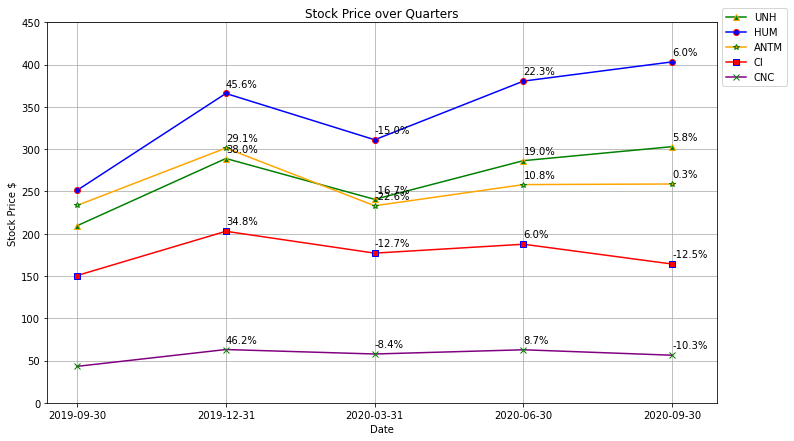

In [44]:
colors = ['green','blue','orange','red','purple']
colors2 = ['orange','red','green','blue','green']
markers = ['^','o','*','s','x']

fig2, ax2 = plt.subplots(figsize=(12, 7))

def plot_graph(ticker,i):
    xaxis = sorted(master_dict[ticker]['Dates'],reverse=False)
    yaxis = master_dict[ticker]['Stock Price']
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Date')
    plt.ylabel(f'Stock Price $')
    plt.title(f'Stock Price over Quarters')
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plt.annotate(
            s = change,
            xy = (x,y),
            xytext = (x,(y + 8))
        )
        z = z + 1
    plt.xlim(-.2,4.3)
    plt.ylim(0,450)
i = 0

for company in companies:
    plot_graph(company,i)
    i += 1
    
plt.legend(companies,bbox_to_anchor=[1, 1.05], loc='upper left')
plt.grid()

plt.savefig('./output_data/stock_johan.png',bbox_inches = 'tight')

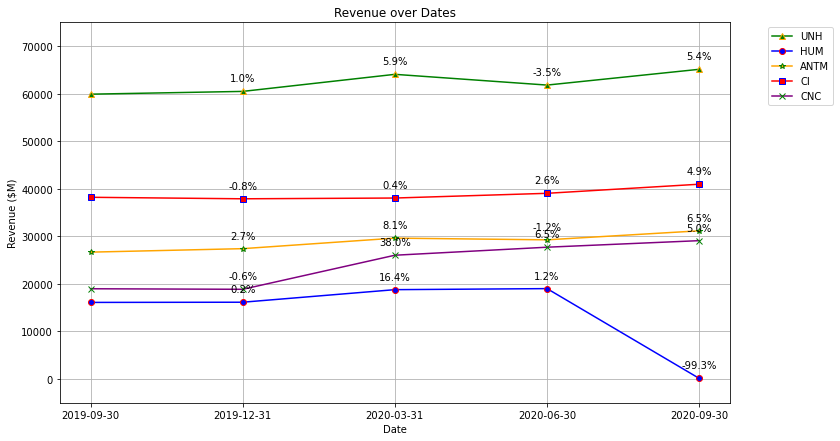

In [45]:
fig1, ax1 = plt.subplots(figsize=(12, 7))

def plot_graph2(ticker,i):
    xaxis = sorted(master_dict[ticker]['Dates'],reverse=False)
    yaxis = list(master_dict[ticker]['Revenue'])
    yaxis.reverse()
    for j in range (0,5):
        yaxis[j] = float(yaxis[j]) / 1000000
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Date')
    plt.ylabel(f'Revenue ($M)')
    plt.title(f'Revenue over Dates')
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plt.annotate(
            s = change,
            xy = (x,y),
            textcoords="offset points", 
            xytext=(0,10),
            ha='center'
        )
        z = z + 1

i = 0    
for name in companies:
    plot_graph2(name, i)
    i = i + 1

plt.legend(companies,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-5000,75000)
plt.grid()

plt.savefig('./output_data/revenue_johan.png',bbox_inches = 'tight')